In [66]:
# IMPORTS
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

pn.extension()

In [67]:
# ANY NEEDED KEYS
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")

In [68]:
#OLAN DATA AND VARIABLES

#TOTAL COLORADO GDP BY INDUSTRY
DetailedGDP = pd.read_csv("../data/cleandata/COGDPDetailed.csv")
DetailedGDP.set_index("Description", inplace=True)

#TOTAL COLORADO GDP BY COUNTY
TotalGDP = pd.read_csv("../data/cleandata/COGDPbyCounties-Totals.csv")
TotalGDP.set_index("Location", inplace=True)
TotalGDP = TotalGDP.transpose()

#GROWTH PERCENTAGE BY INDUSTRY
GrowthIndustry = pd.read_csv("../data/cleandata/COGDPDetailed.csv")

GrowthIndustry['Total'] = GrowthIndustry.sum(axis=1)
GrowthIndustry = GrowthIndustry[['Description', 'Total']]

#ARREST AND OFFENSES COMBINED
Arrests = pd.read_csv("../data/cleandata/FinalizedCrimeStats.csv")

In [69]:
#JACKIE DATA AND VARIABLES

In [70]:
#HOWARD DATA AND VARIABLES

In [71]:
#JAMES DATA AND VARIABLES

In [76]:
#PANEL VISUALIZATION FUNCTIONS

#-----------------
#OLAN FUNCTIONS
def co_gdp_industry():
    
    GDPIndustryChart = DetailedGDP.T.plot.bar(stacked=True, figsize=(12,7), cmap="Accent")
    plt.suptitle('Colorado Gross Domestic Product by Industry', weight='bold')
    plt.ticklabel_format(style='plain', axis='y')
    
    
    return GDPIndustryChart


def co_gdp_county():
    
    CountyGDPChart = TotalGDP.T.plot.bar(stacked=True, figsize=(12,7), cmap="Accent")
    plt.suptitle('Colorado Gross Domestic Product by County', weight='bold')
    plt.ticklabel_format(style='plain', axis='y')
    
    return CountyGDPChart


def co_gdp_growth_percentage():
    
    plt.figure(figsize=(12,7))
    GrowthPercentageChart = plt.plot(GrowthIndustry['Description'], GrowthIndustry['Total'])

    plt.suptitle('Total Gross Domestic Product in Colorado (2010 - 2018)', weight='bold')
    plt.xlabel('Year')
    plt.ylabel('Dollar Amount')
    plt.ticklabel_format(style='plain', axis='y')

    plt.grid()
    plt.show()
    plt.close()

    return GrowthPercentageChart


def crime_no_slider():
    
    px.set_mapbox_access_token(mapbox_token)

    ArrestsPlot = px.scatter_mapbox(Arrests, 
    lat="latitude", lon="longtitude", 
    size="Total Crime", color="Year", 
    mapbox_style="carto-positron",
    zoom=5,
    hover_name="County",
    title="Reported Offenses and Arrests Related to Marijuana by County",
    )

    ArrestsPlot.show()

    return ArrestsPlot


def crime_slider():
    
    px.set_mapbox_access_token(mapbox_token)

    ArrestsPlotSlider = px.scatter_mapbox(Arrests, 
    lat="latitude", lon="longtitude", 
    size="Total Crime", color="Year", 
    mapbox_style="carto-positron",
    zoom=5,
    hover_name="County",
    title="Reported Offenses and Arrests Related to Marijuana by County",
    animation_frame="Year", animation_group="County"
    )

    ArrestsPlotSlider.layout.coloraxis.showscale = False
    ArrestsPlotSlider.show()

    return ArrestsPlotSlider
#-----------------
#-----------------
#JACKIE FUNCTIONS




#-----------------
#-----------------
#HOWARD FUNCTIONS



#-----------------
#-----------------
#JAMES FUNCTIONS

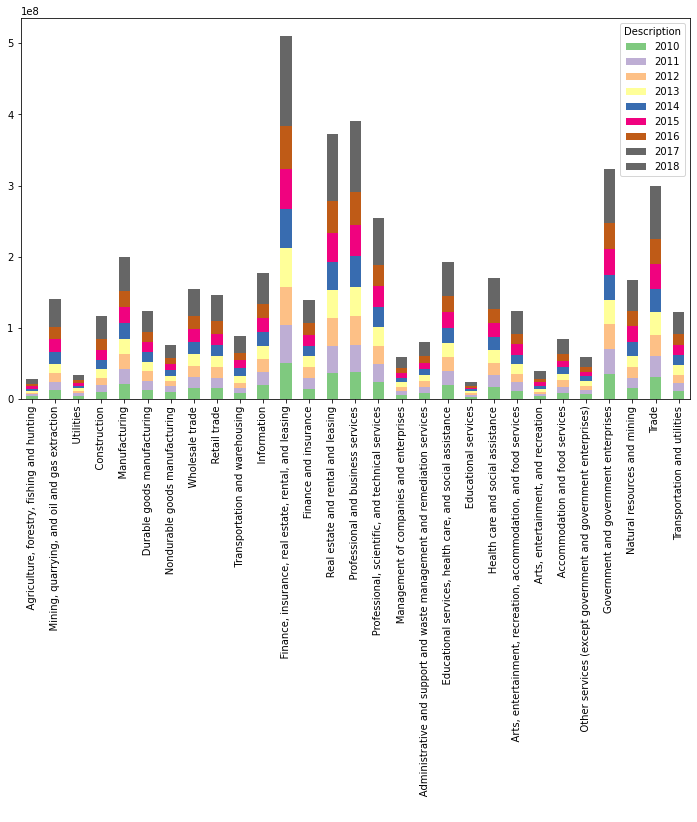

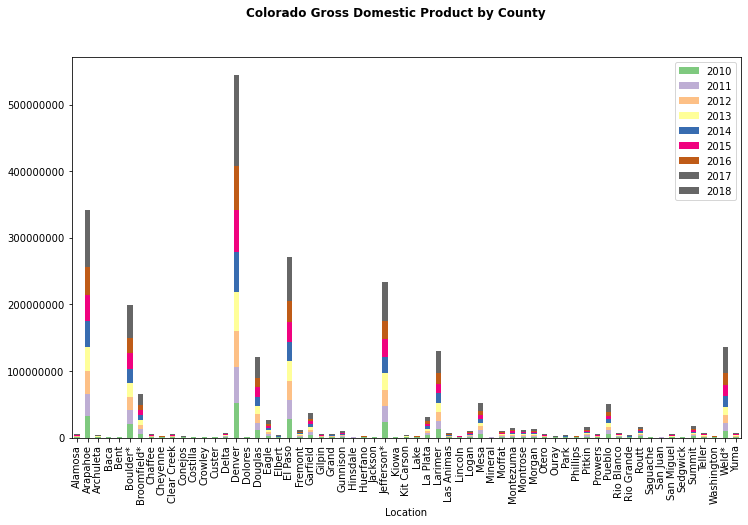

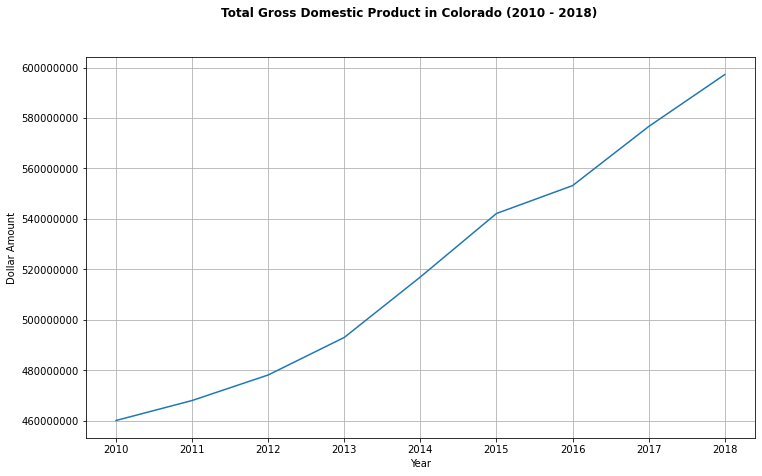

Launching server at http://localhost:55398


In [77]:
#Put charts/plots in a row
CO_GDP_ROW = pn.Row(co_gdp_industry, co_gdp_county)
CO_GDP_ROW

#Put charts/plots in a column
co_GDP_COLUMN = pn.Column(CO_GDP_ROW, co_gdp_growth_percentage)
co_GDP_COLUMN
#sf_yearly_analysis = pn.Column(yearly_analysis_row)
#sf_neighborhood_analysis = pn.Column(average_price_by_neighborhood, top_most_expensive_neighborhoods)
#sf_parallel_plots_analysis = pn.Column(parallel_coordinates, parallel_categories)


panel = pn.Tabs(
    ('Colorado GDP', co_GDP_COLUMN),
   # ('Yearly Market Analysis', sf_yearly_analysis),
   # ('Neighborhood Analysis', sf_neighborhood_analysis),
   # ('Parallel Plots Analysis', sf_parallel_plots_analysis),
)

from bokeh.settings import settings
settings.resources = 'cdn'
settings.resources = 'inline'

panel.show()

In [31]:
#panel.servable()

Tabs
    [0] Column
        [0] Row
            [0] Column
                [0] Column()
                [1] Row
                    [0] Str(AxesSubplot, name='interactive01505')
            [1] Column
                [0] Column()
                [1] Row
                    [0] Str(AxesSubplot, name='interactive01511')
        [1] Column
            [0] Column()
            [1] Row
                [0] Str(list, name='interactive01518')